# 实验二：回归模型

- 回归是监督学习的一个重要问题，回归用于预测**输入变量**和**输出变量**之间的关系，特别是当输入变量的值发生变化时，输出变量的值也随之发生变化。
- 回归模型是一种表示从输入变量到输出变量之间映射的函数
- 对连续值的预测
- 可以用合适的曲线揭示样本点随着自变量的变化关系

## 实验要求
### 截止日期：10月22日
作业的提交格式参考之前的说明，提交到18329300691@163.com
### 基本要求
将数据集winequality-white.csv按照4:1划分为训练集和测试集。
1. 构造线性回归模型，并采用批量梯度下降**和**随机梯度下降进行优化；输出训练集和测试集的均方误差（MSE），画出MSE收敛曲线。
1. 对于批量梯度下降**和**随机梯度下降，采用不同的学习率并进行MSE曲线展示，分析选择最佳的学习率。

特别需要注意：
- 划分数据集时尽可能保持数据分布的一致性，保持样本类别比例相似，可采用分层采样的方式。
- 需要对数据集进行一定的预处理

### 中级要求
探究回归模型在机器学习和统计学上的差异。
- 回归模型在机器学习领域和统计学领域中都十分常用，而且使用方法也相似，但其实际的含义具有本质的区别。我们希望同学们从回归模型的角度更加充分地理解机器学习和统计学的区别。


### 高级要求
编程实现岭回归算法，求解训练样本的岭回归模型，平均训练误差和平均测试误差（解析法、批量梯度下降法和随机梯度下降法**均可**）。

## 线性回归

线性回归模型(Linear Regression)，因为结构简单，可解释性好，实现简单，在工程领域得到广泛应用。

首先对线性函数进行简单的回顾：

![a.png](https://s2.loli.net/2022/10/04/rdm5WLI84BNznUR.png)

### 预测模型

首先，我们明确几个常用的数学符号：
- 特征 (features): $x_i$, 比如房屋的面积，卧室的数量都可以是房屋的特征
- 特征向量 (输入): $x$, 若干个特征组成的向量，代表一套房屋的所有信息。例如，$x^{(i)}_j$ 表示第 $i$ 套房的第 $j$ 个特征
- 输出向量 $y$, $y^{(i)}$ 表示第 $i$ 个输入对应的输出
- 假设 (hypothesis): 也称预测函数，比如一个线性的预测函数是：
$$h_\theta (x)=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n=\theta^T x$$
上述的表达式就是**回归方程 (regression equation)**, $\theta$ 就是回归系数，关系到我们预测的准确程度

## 一元线性回归 vs. 多元线性回归

假设一共有N个特征向量，对于多元线性回归有m个特征：
- 数据集：
   - 一元：$\{(x^{(i)}, y^{(i)})\}$  
   - 多元：$\{(\pmb{x}^{(i)}, y^{(i)})\},\\ \pmb{x}^{(i)}=[x^{(i)}_1, x^{(i)}_2,..., x^{(i)}_m], i=1,2,...,N$


- 假设：
  - 一元：$f(x^{(i)},\pmb{\theta})=\theta_0+\theta_1x^{(i)}$ 
  - 多元：$f(\pmb{x}^{(i)},\pmb{\theta})=\theta_0+\theta_1x^{(i)}_1+\theta_2x^{(i)}_2 + ... +\theta_mx^{(i)}_m $
  
- 参数：
  - 一元：$\pmb{\theta}=[\theta_0, \theta_1]$
  - 多元：$\pmb{\theta}=[\theta_0, \theta_1,\theta_2, ...,\theta_m]$

- 损失函数：
  - MSE：$$Loss=\frac{1}{N}\sum_{i=1}^N(y^{(i)}-f(\pmb{x}^{(i)},\pmb{\theta}))^2$$
  有的资料上损失函数多了个$\frac{1}{2}$：
  $$Loss=\frac{1}{2N}\sum_{i=1}^N(y^{(i)}-f(\pmb{x}^{(i)},\pmb{\theta}))^2$$
  目的是求导后将二次项的系数变为1，加和不加对结果理论上没有影响。
- 目标：损失函数最小

- 解析解：
  - 一元：分别对MSE中的$\theta_0, \theta_1$求偏导
  
  - 多元：对MSE中的$\pmb{\theta}$求偏导
  $\pmb{\theta}=(\pmb{x}^T\pmb{x})^{-1}\pmb{x}^Ty$

### 优化方法
 - 直接求解析解：$\pmb{\theta}=(\pmb{x}^T\pmb{x})^{-1}\pmb{x}^Ty$
   - 优点：不需要试错，可以直接取得最小值，比较快捷。

   - 缺点：当特征过于复杂时，无法求逆。

   - 适用于：小数据场景。（梯度下降相对用的更多一些）
 - 梯度下降法
 - 岭回归

### 梯度下降法

![image.png](https://s2.loli.net/2022/10/04/XOjpPcdCksRwQn8.png)

### 学习率

![image.png](https://s2.loli.net/2022/10/04/OfuUjWLSJF3qyso.png)

### 批量梯度下降
批量梯度下降法为最小化所有训练样本的损失函数，使得最终求解的是全局的最优解。


![image.png](https://s2.loli.net/2022/10/04/TB4DmndiJ9OVPYk.png)

虽然批量梯度下降能够收敛到最小值，但每调节一个$\theta_j$都必须遍历一遍样本集，如果样本的体积m很大，那么这种算法开销巨大，但由于其向量表示，可以利用并行计算优化性能。

### 随机梯度下降

![image.png](https://s2.loli.net/2022/10/04/u6YUkgCxZ7s48ft.png)

### 岭回归

公式$\pmb{\theta}=(\pmb{x}^T\pmb{x})^{-1}\pmb{x}^Ty$不可逆原因:

- 矩阵可逆的充要条件：满秩；
- 存在噪声维，使得特征间存在线性关系，导致矩阵的秩小于特征维度；
- 特征数比样本还多的时候，方程的个数比未知数的个数还要少，所以会导致矩阵的秩小于样本数,无穷多解满足该情况，进而矩阵不可逆。

为了解决这个问题，岭回归在最小二乘估计的基础上增加了一项，即岭回归估计：
$$\pmb{\theta}=(\pmb{x}^T\pmb{x}+\lambda\pmb{I})^{-1}\pmb{x}^Ty$$

为了解决这个问题，岭回归在最小二乘估计的基础上增加了一项，即岭回归估计：
$$\pmb{\theta}=(\pmb{x}^T\pmb{x}+\lambda\pmb{I})^{-1}\pmb{x}^Ty$$

而岭回归模型的目标函数在线性模型的基础上加了L2范数的惩罚项：
$$Loss=\frac{1}{2N}\sum_{i=1}^N(y^{(i)}-f(\pmb{x}^{(i)},\pmb{\theta}))^2+\lambda \sum_{j=0}^N\theta_j^2$$
当岭参数$\lambda$时，得到最小二乘解，当岭参数$\lambda$趋向更大时，岭回归系数 $\pmb{\theta}$ 估计趋向于0。
从岭回归的原理可以知道，岭回归就是改良后的最小二乘估计法，通过放弃最小二乘法的无偏性，通过损失部分特征信息，降低模型精度来得到更符合实际情况的回归系数。

In [ ]:
𝜽=〖(𝐗〗^𝑇 〖𝐗+𝜆𝑰)〗^(−𝟏) 𝐗^𝑇 𝐲 


### winequality-white数据集

In [7]:
import pandas as pd
import numpy as np
data = pd.read_csv("winequality-white.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


最后一列是质量的评级，前面其他的都是酒的特征

### 对数据集进行预处理

对数据集的预处理是一个十分重要的步骤，能够使不同量纲的特征处于同一数值量级，减少方差大的特征的影响，使模型更准确，并加快学习算法的收敛速度。

常用的预处理方法有：标准化、归一化和中心化。同学们根据需要从中选择一种或几种方法进行预处理（采用其他方法亦可）。

![image.png](https://s2.loli.net/2022/10/04/WqxB76cXLGtePSK.png)

In [8]:
# 中心化代码
def Normalization_fun(x):
    # 特征零均值
    x = (x - np.mean(x, 0)) / (np.max(x, 0) - np.min(x, 0))
    return x

# 提取特征和标签
X = data.iloc[:, 0:-1]  # N D
X = Normalization_fun(X)
Y = data.iloc[:, -1]

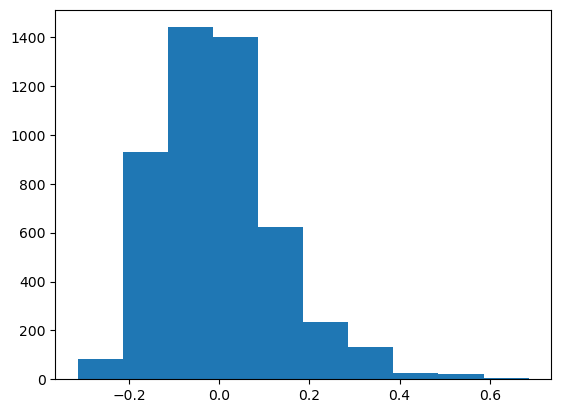

In [9]:
# 可视化中心化后的sulphates特征
import matplotlib.pyplot as plt
plt.hist(X["sulphates"])
plt.show()

In [7]:
# 这里注意一个小trick：回归系数会比特征x多一维，为了向量相乘方便，可以在训练集X左侧添加全为1的一列
data0 = pd.concat([pd.DataFrame(np.ones(X.shape[0]), columns=['x0']), X], axis=1)
data0

,x0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.0,0.013963,-0.008080,0.015547,0.219457,-0.002292,0.033770,0.073409,0.134425,-0.171151,-0.046334,-0.276495
1,1.0,-0.053345,0.021332,0.003499,-0.073488,0.009578,-0.074244,-0.014758,-0.000528,0.101576,0.000178,-0.163591
2,1.0,0.119732,0.001724,0.039644,0.007800,0.012545,-0.018495,-0.095964,0.020679,0.065212,-0.057961,-0.066817
3,1.0,0.033193,-0.047295,-0.008549,0.032340,0.036284,0.040738,0.110532,0.030319,0.001576,-0.104473,-0.099075
4,1.0,0.033193,-0.047295,-0.008549,0.032340,0.036284,0.040738,0.110532,0.030319,0.001576,-0.104473,-0.099075
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,1.0,-0.062960,-0.066903,-0.026621,-0.073488,-0.020096,-0.039401,-0.107565,-0.055666,0.074303,0.011806,0.110602
4894,1.0,-0.024499,0.040940,0.015547,0.024672,0.003643,0.075582,0.068769,0.016823,-0.034788,-0.034706,-0.147462
4895,1.0,-0.034114,-0.037491,-0.086862,-0.079623,-0.014161,-0.018495,-0.063482,-0.028675,-0.180242,-0.034706,-0.179720
4896,1.0,-0.130268,0.011528,-0.020597,-0.081157,-0.070541,-0.053338,-0.065802,-0.102899,0.137939,-0.127729,0.368667


In [8]:
# 初始化回归系数
W_init = np.random.randn(data0.shape[1], 1)
W_init

array([[-0.1852879 ],
       [ 0.38811499],
       [ 0.57586505],
       [ 0.99815774],
       [ 0.05425906],
       [ 1.50600438],
       [-0.04236977],
       [ 1.27560261],
       [-2.07555502],
       [ 0.66357688],
       [-0.34178232],
       [ 0.38693489]])

In [9]:
## TODO：批量梯度下降
## TODO：随机梯度下降
## TODO：回归模型在机器学习和统计学上的差异
## TODO：岭回归